<a href="https://colab.research.google.com/github/ishwarya-nalina/INSE-6220-STRESS-DETECTION-IN-HUMAN/blob/main/Stress_Detection_in_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique for classifying occurrences into three or more categories. (Binary Classification is the process of categorising objects into one of two groups.)


**Install Pycaret**

In [2]:
!pip install pycaret==2.3.6

In [3]:
#installed pycaret version check
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**
The test group consists of stress levels detected in human through the analysis of various changes in the human body observed in sleeping condition. The results indicated stress levels from 0 to 4 and in total five stress levels were observed. This data was recorded for experimental purposes by the IEEE student members of University of North Texas.


The information in the data collection can be used for categorization and cluster analysis.


Attribute Information:

To construct the data, eight internal and external changes in human body is recorded and the parameters are listed below:
1. snoring range, SR in dB
2. respiration rate, RR in bpm
3. body temperature, T in fahrenheit
4. rate of limb movement, LM
5. eye movement rate, EM
6. sleep rate,SLR
7. blood oxygen levels, BO
8. heart rate, HR in bpm.
All of these parameters were real-valued continuous.

 The data obtained through the below mentioned link is altered and then utilised in this project.

https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep

In [6]:
#reading the csv file
df = pd.read_csv('https://raw.githubusercontent.com/ishwarya-nalina/INSE-6220-STRESS-DETECTION-IN-HUMAN/main/Stress%20Detection%20Dataset.csv')
df.head(25)

SR      RR       T      LM      BO      EM    SLR     HR  SL
0   93.800  25.680  91.840  16.600  89.840   99.60  1.840  74.20   3
1   91.640  25.104  91.552  15.880  89.552   98.88  1.552  72.76   3
2   60.000  20.000  96.000  10.000  95.000   85.00  7.000  60.00   1
3   85.760  23.536  90.768  13.920  88.768   96.92  0.768  68.84   3
4   48.120  17.248  97.872   6.496  96.248   72.48  8.248  53.12   0
5   56.880  19.376  95.376   9.376  94.064   83.44  6.376  58.44   1
6   72.000  21.200  93.200  11.200  91.200   91.00  3.800  63.00   2
7   59.440  19.888  95.888   9.888  94.832   84.72  6.888  59.72   1
8   92.360  25.296  91.648  16.120  89.648   99.12  1.648  73.24   3
9   97.440  27.440  86.800  17.720  84.160  101.80  0.000  78.60   4
10  80.720  22.192  90.096  12.240  88.096   95.24  0.096  65.48   3
11  99.936  29.936  89.920  18.968  87.904  104.92  0.000  84.84   4
12  74.240  21.424  93.424  11.424  91.424   92.12  4.136  63.56   2
13  99.168  29.168  88.960  18.584  86.752  103.96  0.000  82.92   4
14  85.160  23.376  90.688  13.720  88.688   96.72  0.688  68.44   3
15  97.696  27.696  87.120  17.848  84.544  102.12  0.000  79.24   4
16  75.840  21.584  93.584  11.584  91.584   92.92  4.376  63.96   2
17  45.000  16.000  96.000   4.000  95.000   60.00  7.000  50.00   0
18  98.496  28.496  88.120  18.248  85.744  103.12  0.000  81.24   4
19  64.000  20.400  92.400  10.400  90.400   87.00  2.600  61.00   2
20  81.320  22.352  90.176  12.440  88.176   95.44  0.176  65.88   3
21  75.520  21.552  93.552  11.552  91.552   92.76  4.328  63.88   2
22  52.000  18.400  94.400   8.400  92.600   81.00  5.400  56.00   1
23  66.400  20.640  92.640  10.640  90.640   88.20  2.960  61.60   2
24  71.840  21.184  93.184  11.184  91.184   90.92  3.776  62.96   2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SR      261 non-null    float64
 1   RR      261 non-null    float64
 2   T       261 non-null    float64
 3   LM      261 non-null    float64
 4   BO      261 non-null    float64
 5   EM      261 non-null    float64
 6   SLR     261 non-null    float64
 7   HR      261 non-null    float64
 8   SL      261 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 18.5 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  4


Since the number of duplicated rows is almost negligible when compared to the total number of rows in the dataset, duplicated rows are not deleted.

In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

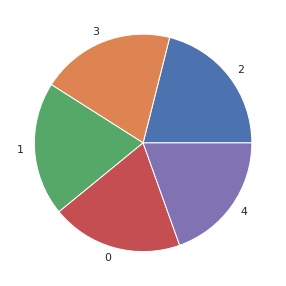

In [10]:
y =df['SL']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

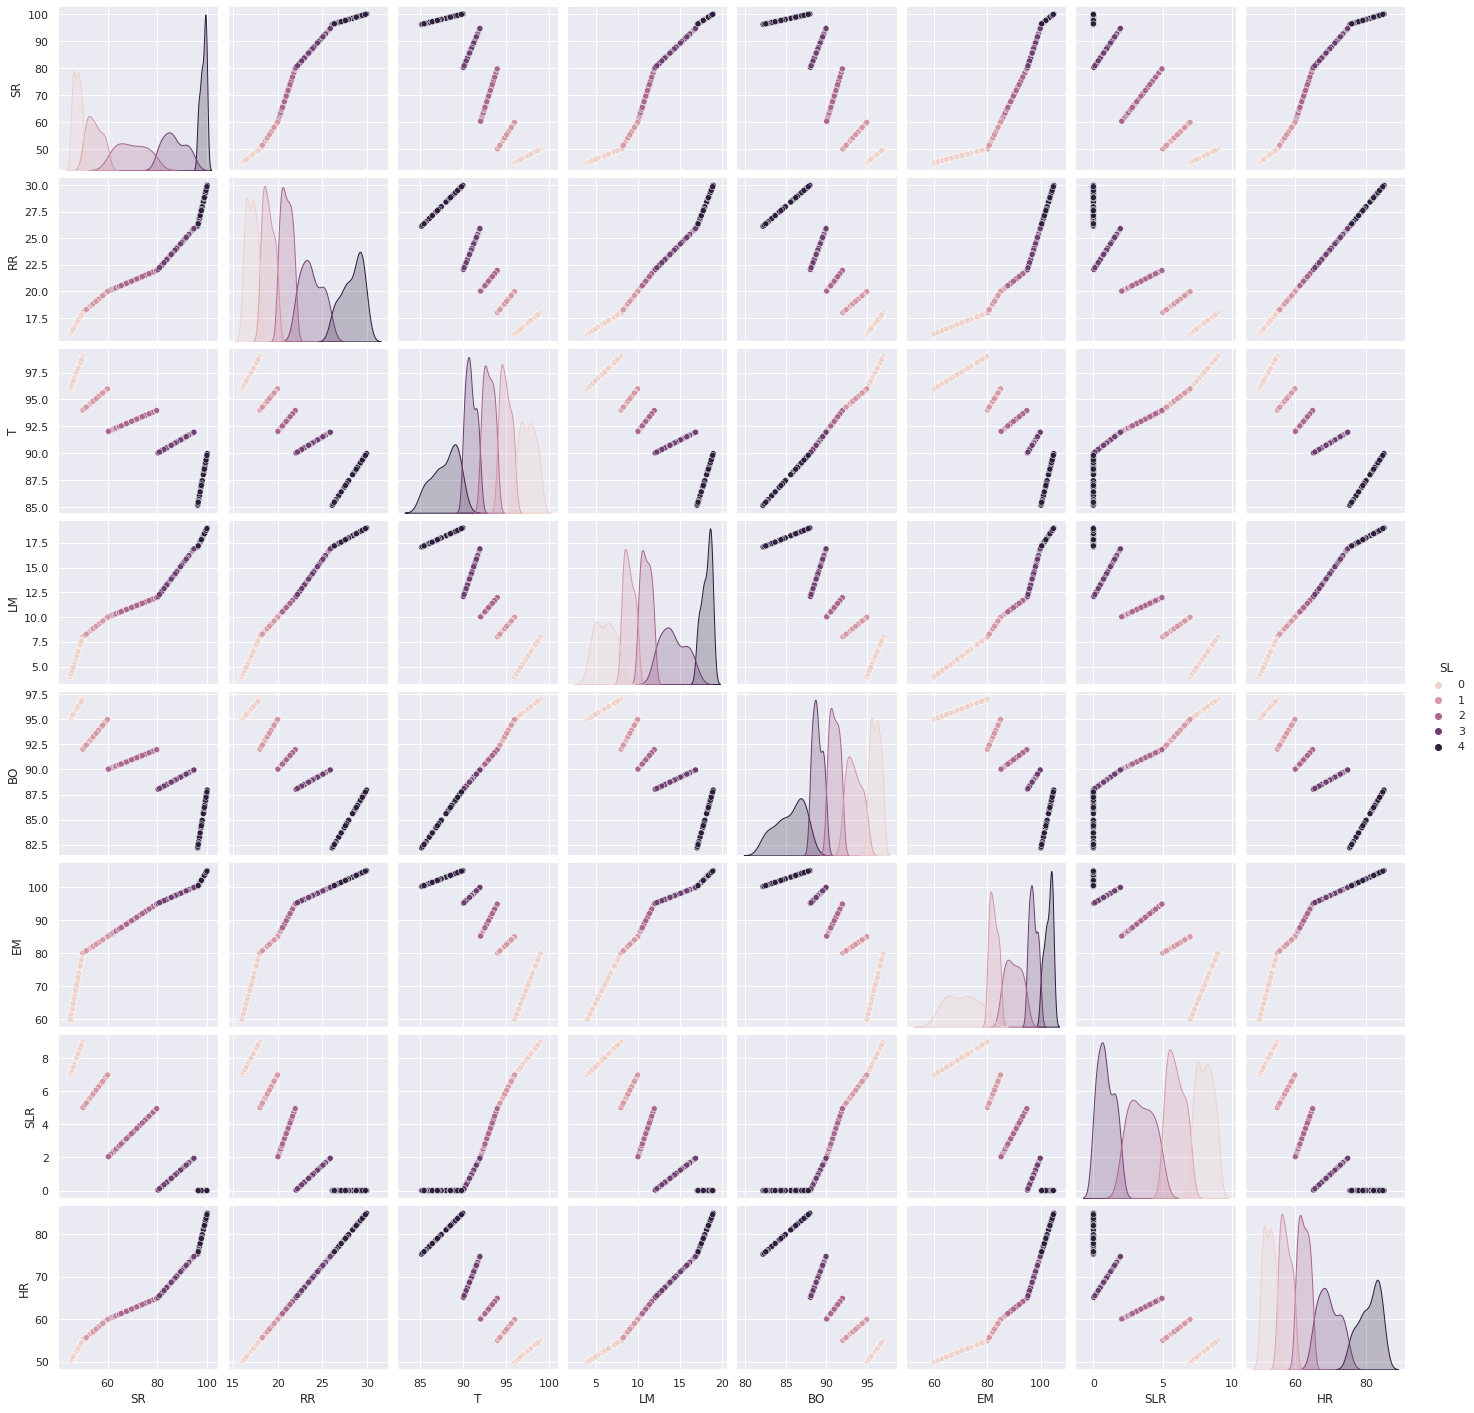

In [11]:
sns.pairplot(df, hue='SL')
plt.show()

In [12]:
X = df.drop(columns=['SL'])
X.head(10)

SR      RR       T      LM      BO      EM    SLR     HR
0  93.80  25.680  91.840  16.600  89.840   99.60  1.840  74.20
1  91.64  25.104  91.552  15.880  89.552   98.88  1.552  72.76
2  60.00  20.000  96.000  10.000  95.000   85.00  7.000  60.00
3  85.76  23.536  90.768  13.920  88.768   96.92  0.768  68.84
4  48.12  17.248  97.872   6.496  96.248   72.48  8.248  53.12
5  56.88  19.376  95.376   9.376  94.064   83.44  6.376  58.44
6  72.00  21.200  93.200  11.200  91.200   91.00  3.800  63.00
7  59.44  19.888  95.888   9.888  94.832   84.72  6.888  59.72
8  92.36  25.296  91.648  16.120  89.648   99.12  1.648  73.24
9  97.44  27.440  86.800  17.720  84.160  101.80  0.000  78.60

In [13]:
X.describe().transpose()

count       mean        std     min     25%    50%     75%      max
SR   261.0  71.358927  19.235682  45.000  52.240  69.60  90.200   99.968
RR   261.0  21.795004   4.017913  16.000  18.448  20.96  24.720   29.968
T    261.0  92.855632   3.391499  85.160  90.496  92.96  95.376   98.976
LM   261.0  11.661548   4.269814   4.000   8.448  10.96  15.400   18.984
BO   261.0  90.962943   3.727175  82.192  88.496  90.96  94.064   96.984
EM   261.0  88.558736  11.756869  60.000  81.120  89.80  98.400  104.960
SLR  261.0   3.657226   3.053822   0.000   0.496   3.44   6.376    8.984
HR   261.0  64.487510  10.044783  50.000  56.120  62.40  71.800   84.920

**Standardize the Data**

In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

SR        RR         T        LM        BO        EM       SLR  \
0  1.168879  0.968777 -0.300039  1.158819 -0.301864  0.940937 -0.596209   
1  1.056372  0.825143 -0.385121  0.989869 -0.379283  0.879579 -0.690699   
2 -0.591648 -0.447609  0.928913 -0.389886  1.085222 -0.303276  1.096723   
3  0.750103  0.434141 -0.616731  0.529951 -0.590034  0.712548 -0.947919   
4 -1.210437 -1.133857  1.481942 -1.212107  1.420704 -1.370231  1.506176   
5 -0.754158 -0.603211  0.744571 -0.536309  0.833611 -0.436219  0.891996   
6  0.033391 -0.148372  0.101734 -0.108303  0.063725  0.208045  0.046842   
7 -0.620816 -0.475537  0.895826 -0.416167  1.040061 -0.327137  1.059977   
8  1.093874  0.873021 -0.356760  1.046185 -0.353477  0.900032 -0.659202   
9  1.358474  1.407656 -1.788963  1.421629 -1.828734  1.128421 -1.199891   

         HR  
0  0.968777  
1  0.825143  
2 -0.447609  
3  0.434141  
4 -1.133857  
5 -0.603211  
6 -0.148372  
7 -0.475537  
8  0.873021  
9  1.407656

In [15]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
SR   261.0 -1.421809e-16  1.001921 -1.372947 -0.995840 -0.091617  0.981367   
RR   261.0  1.407452e-16  1.001921 -1.445063 -0.834621 -0.208220  0.729387   
T    261.0  1.122133e-15  1.001921 -2.273454 -0.697086  0.030832  0.744571   
LM   261.0 -1.384057e-16  1.001921 -1.797799 -0.754066 -0.164620  0.877236   
BO   261.0  2.216884e-15  1.001921 -2.357763 -0.663152 -0.000791  0.833611   
EM   261.0 -2.307647e-16  1.001921 -2.433777 -0.633930  0.105781  0.838673   
SLR  261.0  1.146380e-16  1.001921 -1.199891 -1.037159 -0.071269  0.891996   
HR   261.0  1.194766e-15  1.001921 -1.445063 -0.834621 -0.208220  0.729387   

          max  
SR   1.490149  
RR   2.038048  
T    1.808088  
LM   1.718229  
BO   1.618552  
EM   1.397717  
SLR  1.747649  
HR   2.038048

**Observations and variables**

In [16]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

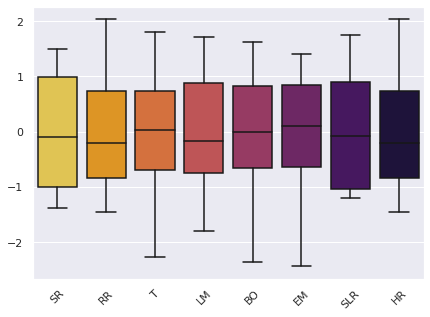

In [17]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="inferno_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

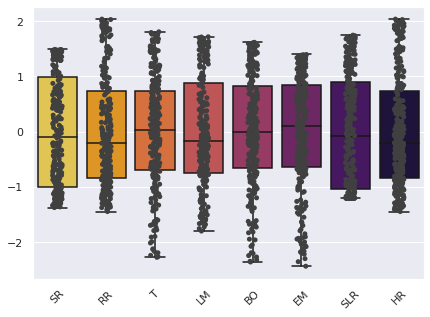

In [18]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="inferno_r")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

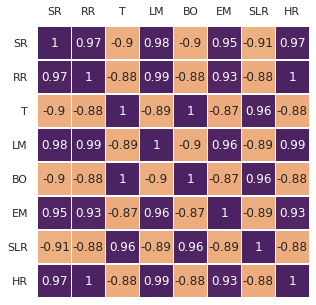

In [19]:
ax = sns.heatmap(X.corr(), cmap='flare', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

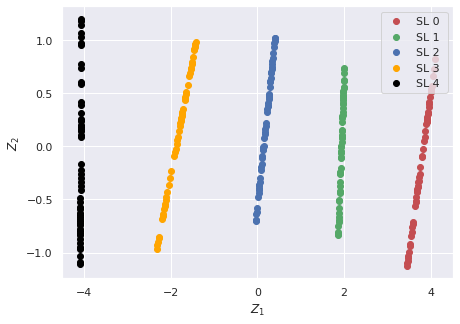

In [20]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(SL 0)->0,  2(SL 1)->1, 3(SL 2)->2, 3(SL 3)->3, 4(SL 4)->4
idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)
idx_2 = np.where(y == 2)
idx_3 = np.where(y == 3)
idx_4 = np.where(y == 4)

plt. figure()
plt.scatter(Z[idx_0,0], Z[idx_0,1], c='r', label='SL 0 ')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='g', label='SL 1 ')
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='b', label='SL 2 ')
plt.scatter(Z[idx_3,0], Z[idx_3,1], c='orange', label='SL 3 ')
plt.scatter(Z[idx_4,0], Z[idx_4,1], c='black', label='SL 4 ')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

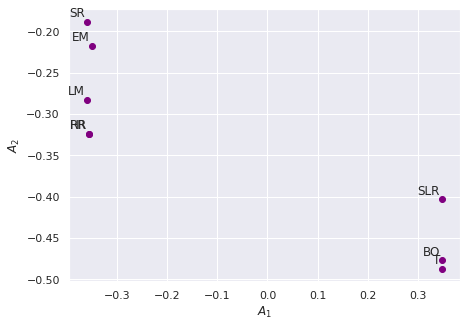

In [21]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='PURPLE')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


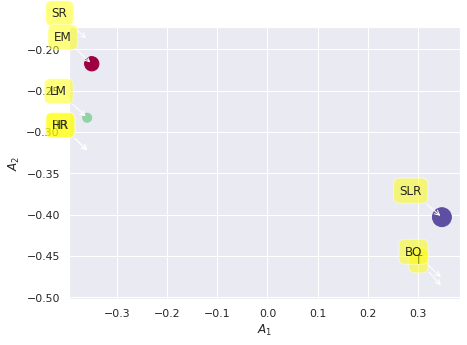

In [22]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

In [23]:
pca.components_

array([[-3.59211654e-01, -3.56410529e-01,  3.48754792e-01,
        -3.59729062e-01,  3.48887543e-01, -3.50603379e-01,
         3.48180855e-01, -3.56410529e-01],
       [-1.88578608e-01, -3.23880097e-01, -4.87239792e-01,
        -2.82847918e-01, -4.76932424e-01, -2.17594858e-01,
        -4.03018431e-01, -3.23880097e-01],
       [-5.67393759e-02,  3.40059730e-01, -2.13637693e-01,
         5.02445603e-02, -1.90864403e-01, -7.53741527e-01,
         3.35824827e-01,  3.40059730e-01],
       [-2.51106312e-01, -1.15418695e-01, -2.52540526e-01,
         1.63421228e-01, -3.74326659e-01,  4.10556304e-01,
         7.14942325e-01, -1.15418695e-01],
       [ 8.76546803e-01, -2.35750102e-01, -4.17445424e-02,
        -1.31080674e-01, -8.21447163e-02, -1.30541174e-01,
         2.78919306e-01, -2.35750102e-01],
       [-2.78430940e-02, -2.87335904e-01,  7.79537812e-02,
         8.61453603e-01,  2.25892715e-02, -2.73479979e-01,
        -1.03054561e-01, -2.87335904e-01],
       [ 4.67171819e-03, -3.116232

**Scree plot**

 [7.50993397e+00 3.45517544e-01 9.79925702e-02 4.74598238e-02
 2.50137166e-02 3.27827791e-03 1.57333053e-03 8.83150733e-32]


Text(0, 0.5, 'Explained variance')

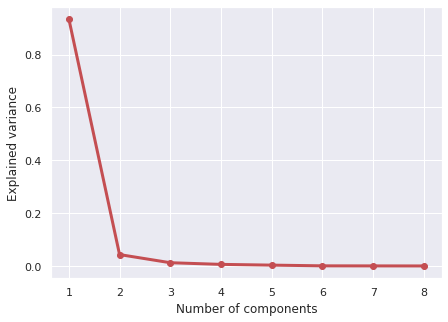

In [24]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print('', Lambda)

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

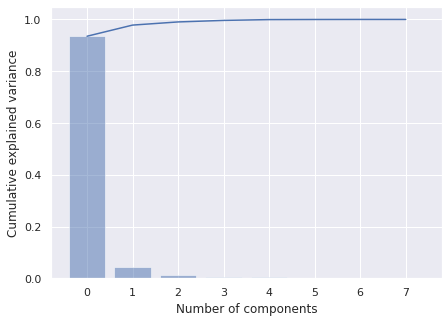

In [25]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

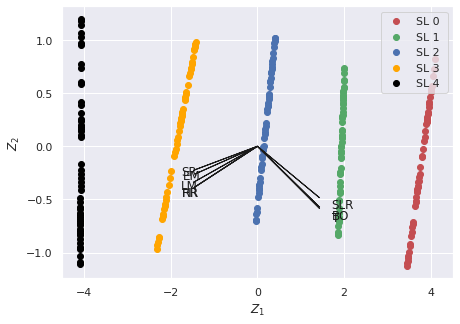

In [26]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_0,0], Z[idx_0,1], c='r', label='SL 0 ')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='g', label='SL 1 ')
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='b', label='SL 2 ')
plt.scatter(Z[idx_3,0], Z[idx_3,1], c='orange', label='SL 3 ')
plt.scatter(Z[idx_4,0], Z[idx_4,1], c='black', label='SL 4 ')

plt.legend(loc='upper right')

##**Using PCA Library**

In [27]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=3751b1e0e853efe6716e3342f00300a04392aefa76a3a903b82cc2858c82d48d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [28]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [29]:
out['PC']

PC1       PC2
0   -2.274741 -0.850030
1   -2.139236 -0.558175
2    1.862616 -0.834396
3   -1.770362  0.236317
4    3.696400 -0.402931
..        ...       ...
256  1.947257  0.090480
257  1.929865 -0.099563
258  3.954782  0.365863
259 -4.071002  1.064515
260  0.089555 -0.194413

[261 rows x 2 columns]

**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23214ae310>)

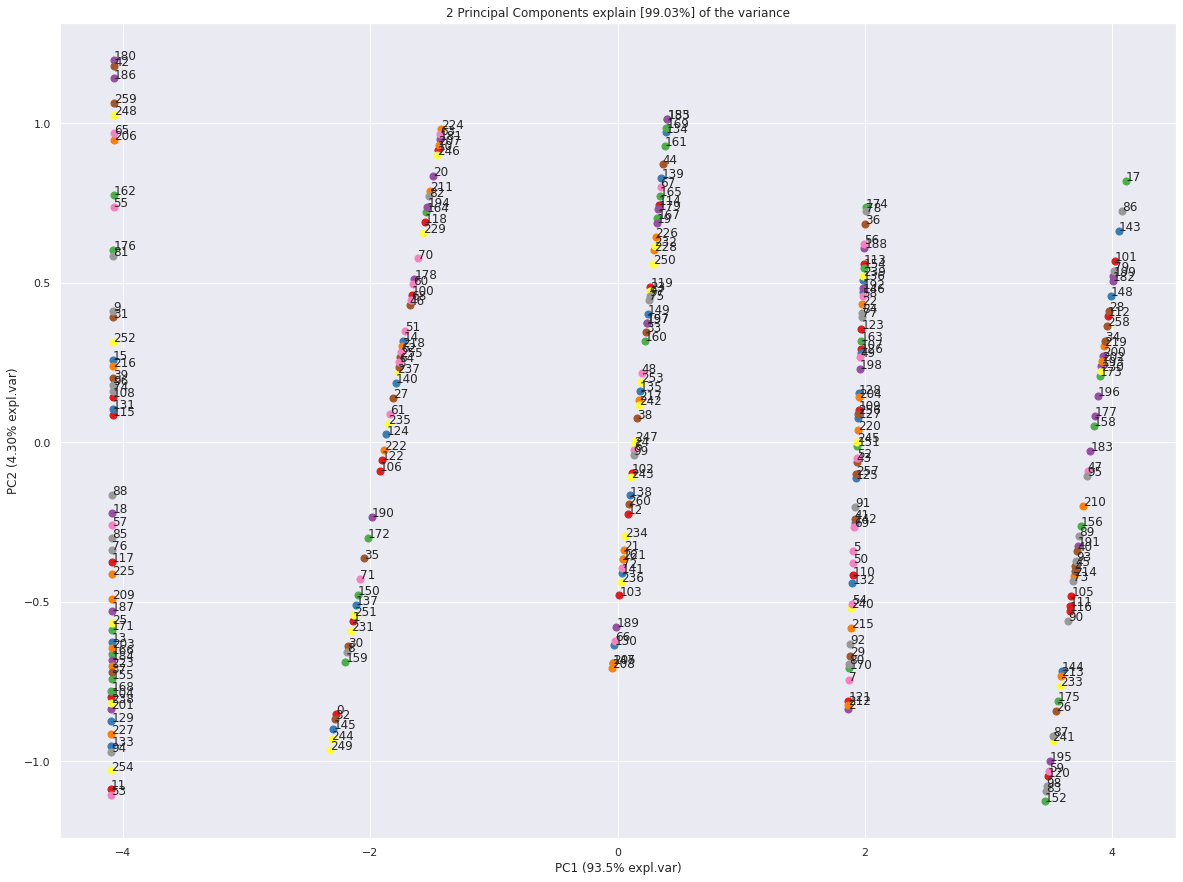

In [30]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [31]:
A = out['loadings'].T

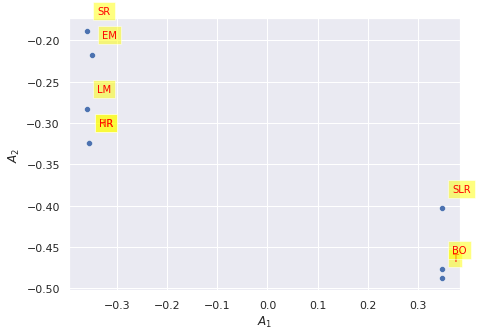

In [32]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

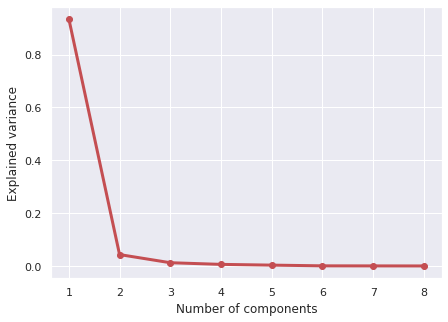

In [33]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

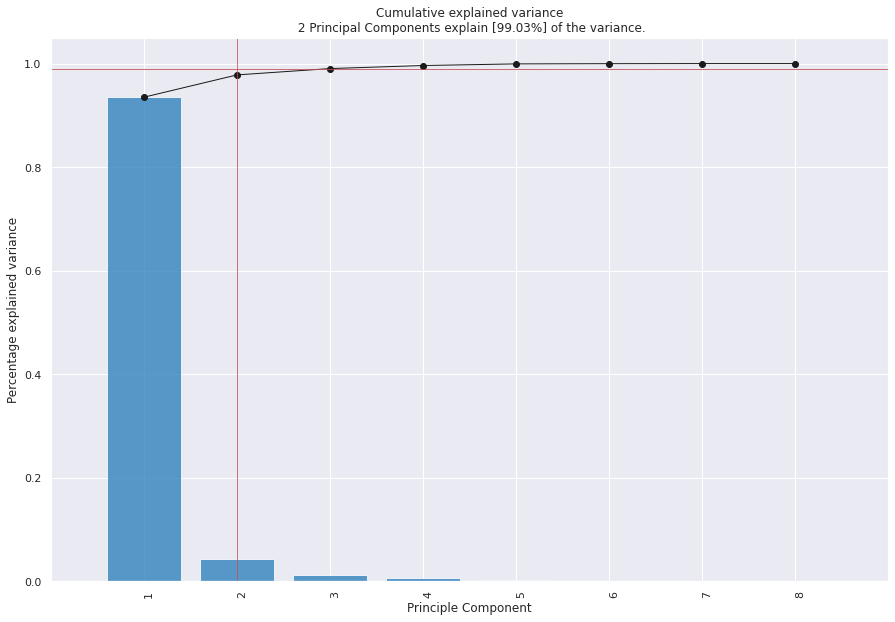

<Figure size 504x360 with 0 Axes>

In [34]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


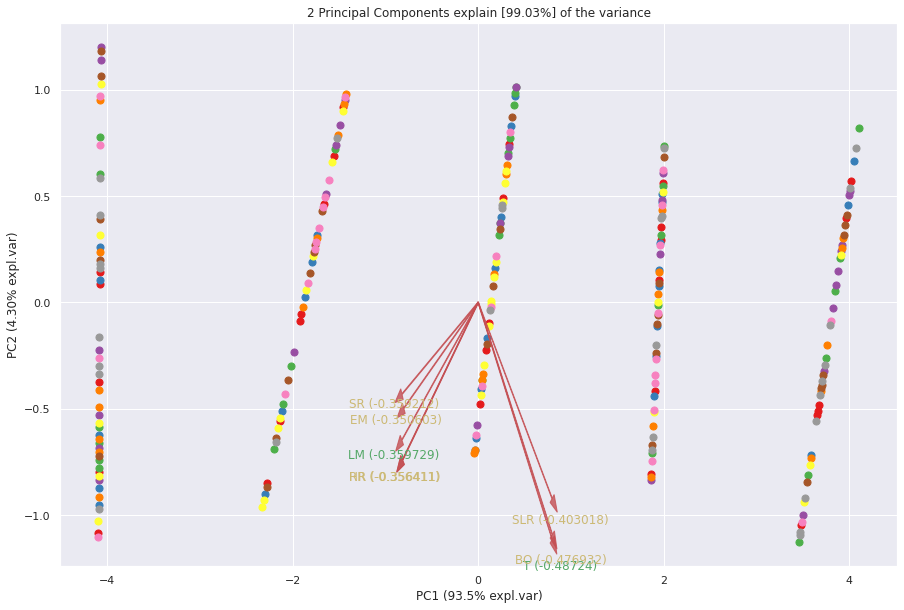

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23297a9ed0>)

In [35]:
model.biplot(label=False, legend=False)

Since this dataset has only two Principal Components, it is not possible to have a 3d biplot which requires a minimum of three PCs.

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [36]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


A sample of 26 observations has been withheld from the original dataset to be used for predictions in order to show the predict model() function on unseen data. This is not to be mistaken with a train/test split, as this one is done to imitate a real-life situation. Another way to look at it is that these 26 records were unavailable when the machine learning experiment was conducted.

In [37]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (235, 9)
Unseen Data For Predictions: (26, 9)


**Setting up the Environment in PyCaret**

The setup() function in pycaret creates the transformation pipeline to prepare the data for modelling and deployment, as well as initialises the environment. Before calling any other pycaret method, setup() must be invoked. It requires two parameters: a pandas dataframe and the target column's name. The remaining settings are optional and are used to tailor the pre-processing pipeline.

PyCaret's inference mechanism will automatically infer the data types for all features based on specific criteria when setup() is called. Although the data type should be appropriately inferred, this is not always the case. After setup(), PyCaret presents a table containing the features and their inferred data types to account for this. If all of the data types have been appropriately recognised, hit enter to continue or type quit to end the expriment. PyCaret automatically conducts a few pre-processing activities that are critical to any machine learning experiment, thus ensuring that the data types are accurate is critical. Because these tasks are carried out differently for each data type, it is critical that they be configured correctly.

In [38]:
from pycaret.classification import *
clf = setup(data=data, target='SL', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target                SL
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (235, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (164, 6)
12                    Transformed Test Set           (71, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              46f5
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

When the setup is completed successfully, the information grid is printed, which comprises various critical pieces of information. The majority of the data is connected to the pre-processing pipeline that is created when setup() is called. The majority of these features are beyond the scope of this lesson, however there are a few things to keep in mind at this point:

* **session_id** : For later reproducibility, a pseudo-random number is distributed as a seed in all functions. If no session id is provided, a random number is produced and given to all functions automatically. For further reproducibility, the session id is set to 123 in this experiment.

* **Target Type** : Multiclass or binary. The target type is discovered and displayed automatically. The experiment is carried out in the same way for Binary and Multiclass problems. All of the functions are the same.

* **Label Encoded** : When the Target variable is of type string (i.e. "Yes" or "No") rather than 1 or 0, the label is automatically encoded into 1 and 0 and the mapping (0: No, 1: Yes) is displayed for reference. 

* **Original Data** : The dataset's original shape is displayed. In this experiment, (189, 8) refers to the number of samples and the number of characteristics, which includes the class column.

* **Missing Values** : This will be True if there are missing values in the original data. There are no missing values in the dataset for this experiment.

* **Numeric Features** : The number of numeric features inferred. Seven of the eight features in this dataset are estimated to be numeric.

* **Categorical Features** : The number of categorical features inferred. There are no categorical features in this dataset.

* **Transformed Train Set** : The shape of the altered training set is displayed. For the changed train set, notice how the original shape of (189, 8) is turned into (132, 7).

* **Transformed Test Set** : The shape of the converted test/hold-out set is displayed. The test/hold-out set has 57 samples. This split is based on a default of 70/30, which may be modified in setup with the train size parameter.

It's worth noting how a few tasks that are required for modelling are handled automatically, such as missing value imputation and category encoding. The majority of the setup() arguments are optional and are used to customise the pre-processing pipeline.

**Comparing All Models**

In [39]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    1.0000  1.0000  1.0000  1.0000   
knn                K Neighbors Classifier    1.0000  1.0000  1.0000  1.0000   
nb                            Naive Bayes    1.0000  1.0000  1.0000  1.0000   
lda          Linear Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
lightgbm  Light Gradient Boosting Machine    1.0000  1.0000  1.0000  1.0000   
rf               Random Forest Classifier    0.9938  1.0000  0.9933  0.9953   
gbc          Gradient Boosting Classifier    0.9938  1.0000  0.9933  0.9953   
dt               Decision Tree Classifier    0.9879  0.9926  0.9883  0.9909   
ridge                    Ridge Classifier    0.8908  0.0000  0.8917  0.9267   
ada                  Ada Boost Classifier    0.6099  0.8531  0.5883  0.4859   
svm                   SVM - Linear Kernel    0.5776  0.0000  0.5800  0.5119   
dummy                    Dummy Classifier    0.2129  0.5000  0.2000  0.0460   
qda       Quadratic Discriminant Analysis    0.2081  0.0000  0.2000  0.0445   

              F1   Kappa     MCC  TT (Sec)  
lr        1.0000  1.0000  1.0000     0.363  
knn       1.0000  1.0000  1.0000     0.111  
nb        1.0000  1.0000  1.0000     0.013  
lda       1.0000  1.0000  1.0000     0.014  
et        1.0000  1.0000  1.0000     0.402  
lightgbm  1.0000  1.0000  1.0000     0.069  
rf        0.9936  0.9922  0.9926     0.456  
gbc       0.9936  0.9922  0.9926     0.290  
dt        0.9877  0.9848  0.9857     0.012  
ridge     0.8838  0.8625  0.8740     0.010  
ada       0.5145  0.5049  0.5955     0.079  
svm       0.4990  0.4772  0.5364     0.059  
dummy     0.0755  0.0000  0.0000     0.013  
qda       0.0730  0.0000  0.0000     0.013

In [40]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create a Model**

The most granular function in PyCaret is create model, which is often the foundation for most of PyCaret's features. This function, as the name implies, trains and evaluates a model using cross validation, which can be controlled with the fold parameter. The output shows Accuracy, Recall, Precision, F1, Kappa, and MCC by fold in a score grid.

The below mentioned algorithms are used to classify the data in this project.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')



**Create Decision Tree Classifier**

In [41]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9412  0.9643  0.9500  0.9559  0.9412  0.9264  0.9304
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9375  0.9615  0.9333  0.9531  0.9357  0.9216  0.9261
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9879  0.9926  0.9883  0.9909  0.9877  0.9848  0.9857
SD      0.0243  0.0148  0.0236  0.0182  0.0247  0.0304  0.0287

In [42]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:**  The default hyperparameters are used when a model is built with the create model() function. The tune model() function is used to tune hyperparameters. The tune model() function performs a random grid search of hyperparameters throughout a predefined search space. It is set to optimise Accuracy by default, however this can be altered with the optimise parameter. This function tunes a model's hyperparameters and scores it using stratified cross validation on a pre-defined search space. The output shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold in a score grid.

**Tune Decision Tree Model**

In [43]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9375  0.9615  0.9333  0.9531  0.9357  0.9216  0.9261
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9938  0.9962  0.9933  0.9953  0.9936  0.9922  0.9926
SD      0.0188  0.0115  0.0200  0.0141  0.0193  0.0235  0.0222

In [44]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [46]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [47]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [48]:
knn = create_model('knn')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

**Tune K Neighbors Model**

In [49]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

**Evaluate K Neighbors Model**

In [50]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [51]:
lr = create_model('lr')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

**Tune Logistic Regression Model**

In [52]:
tuned_lr = tune_model(lr)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

**Evaluate Logistic Regression Model**

In [53]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [54]:
rf = create_model('rf')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9375  1.0  0.9333  0.9531  0.9357  0.9216  0.9261
7       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9938  1.0  0.9933  0.9953  0.9936  0.9922  0.9926
SD      0.0188  0.0  0.0200  0.0141  0.0193  0.0235  0.0222

**Tune Random Forest Model**

In [55]:
tuned_rf = tune_model(rf)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9375  1.0  0.9333  0.9531  0.9357  0.9216  0.9261
7       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9938  1.0  0.9933  0.9953  0.9936  0.9922  0.9926
SD      0.0188  0.0  0.0200  0.0141  0.0193  0.0235  0.0222

**Evaluate Random Forest Model**

In [56]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [57]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

In [58]:
tuned_best_model

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [59]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [60]:
clf_pca = setup(data=data, target='SL', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target                SL
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (235, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (164, 3)
12                    Transformed Test Set           (71, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              4fa0
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [61]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    1.0000  1.0000  1.0000  1.0000   
knn                K Neighbors Classifier    1.0000  1.0000  1.0000  1.0000   
nb                            Naive Bayes    1.0000  1.0000  1.0000  1.0000   
dt               Decision Tree Classifier    1.0000  1.0000  1.0000  1.0000   
rf               Random Forest Classifier    1.0000  1.0000  1.0000  1.0000   
qda       Quadratic Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
gbc          Gradient Boosting Classifier    1.0000  1.0000  1.0000  1.0000   
lda          Linear Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
lightgbm  Light Gradient Boosting Machine    0.9875  1.0000  0.9867  0.9925   
svm                   SVM - Linear Kernel    0.8533  0.0000  0.8450  0.8564   
ridge                    Ridge Classifier    0.7555  0.0000  0.7417  0.7515   
ada                  Ada Boost Classifier    0.6224  0.8545  0.6000  0.4867   
dummy                    Dummy Classifier    0.2129  0.5000  0.2000  0.0460   

              F1   Kappa     MCC  TT (Sec)  
lr        1.0000  1.0000  1.0000     0.026  
knn       1.0000  1.0000  1.0000     0.115  
nb        1.0000  1.0000  1.0000     0.013  
dt        1.0000  1.0000  1.0000     0.013  
rf        1.0000  1.0000  1.0000     0.455  
qda       1.0000  1.0000  1.0000     0.012  
gbc       1.0000  1.0000  1.0000     0.288  
lda       1.0000  1.0000  1.0000     0.014  
et        1.0000  1.0000  1.0000     0.405  
lightgbm  0.9859  0.9843  0.9860     0.047  
svm       0.8283  0.8155  0.8366     0.062  
ridge     0.7153  0.6920  0.7166     0.011  
ada       0.5227  0.5205  0.6118     0.078  
dummy     0.0755  0.0000  0.0000     0.012

In [62]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [63]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

In [64]:
tuned_best_model_pca

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [65]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [66]:
!pip install shap

     |████████████████████████████████| 564 kB 5.1 MB/s 


In [67]:
import shap

In [68]:
rf_pca = create_model('rf')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

In [69]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

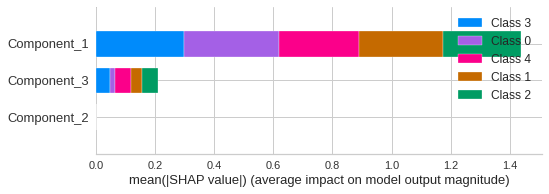

In [70]:
interpret_model(tuned_rf_pca, plot='summary')

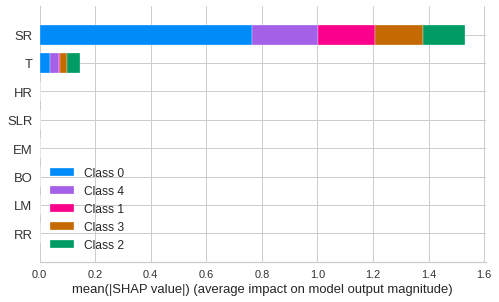

In [71]:
explainer = shap.TreeExplainer(tuned_rf_pca)
X = df.drop('SL', axis=1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [72]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [73]:
interpret_model(tuned_rf_pca, plot='reason')